In [1]:
%load_ext autoreload
%autoreload 2
# %matplotlib inline

import pickle
import matplotlib.pyplot as plt
import os
from keras import models

import cv2 as cv
from kb.generator.kariertes_blatt import get_seite_data_generator, __get_data_generator
from kb.models import dice_coeff, bce_dice_loss

plt.rcParams["figure.figsize"] = (10,10)

## Model

In [2]:
oben_model = models.load_model("models/unter.hdf5",
                               custom_objects = {'bce_dice_loss': bce_dice_loss, 'dice_coeff': dice_coeff})
seite_model = models.load_model("models/seite.hdf5",
                                custom_objects = {'bce_dice_loss': bce_dice_loss, 'dice_coeff': dice_coeff})

seite_model.summary()


Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d_28 (Conv2D)              (None, 256, 256, 32) 896         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_27 (BatchNo (None, 256, 256, 32) 128         conv2d_28[0][0]                  
__________________________________________________________________________________________________
activation_27 (Activation)      (None, 256, 256, 32) 0           batch_normalization_27[0][0]     
_______________________________________________________________________________________

## Training history
### Prepare history files

In [24]:
histories_path = [
    './models/oben_history.hdf5',
    './models/seite_history.hdf5',
    './models/unter_history.hdf5'
]

histories = list(map(lambda path: pickle.load(open(path, "rb")), histories_path))

In [25]:
def graph_accuracy(history, name=""):
    plt.plot(history['dice_coeff'])
    plt.plot(history['val_dice_coeff'])
    plt.title('Model accuracy of "' + name + '"')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

def graph_loss(history, name=""):
    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    plt.title('Loss of "' + name + '"')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

### Show learning curve

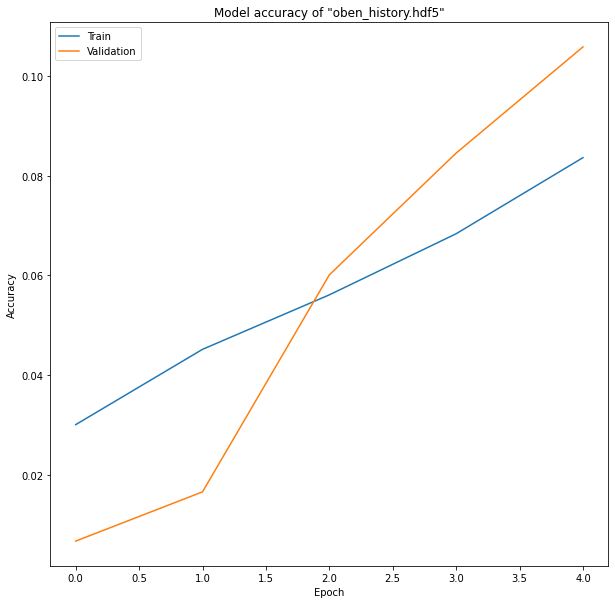

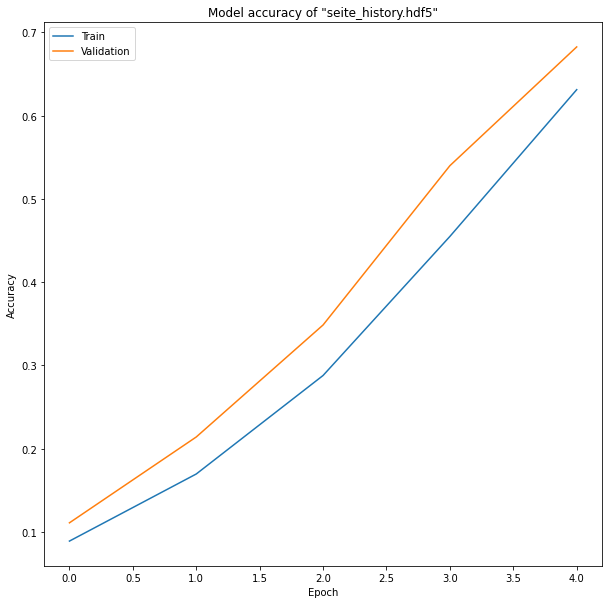

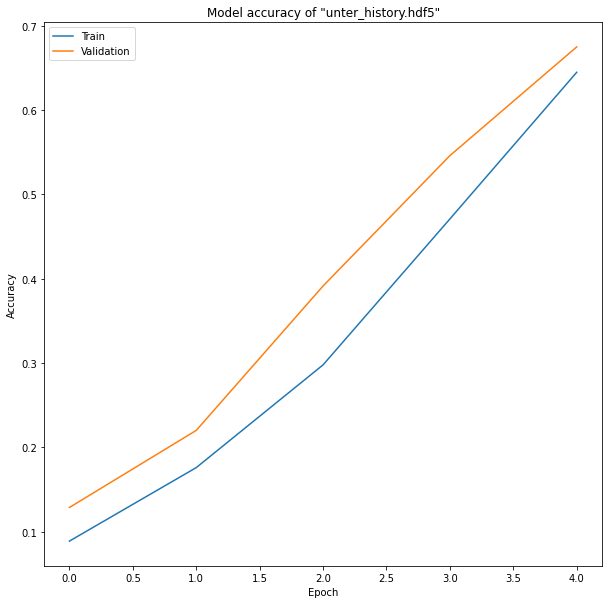

In [26]:
for history, path in zip(histories, histories_path):
    graph_accuracy(history, os.path.basename(path))

### Show loss curve

We use **sparse_categorical_crossentropy**.
https://stats.stackexchange.com/questions/326065/cross-entropy-vs-sparse-cross-entropy-when-to-use-one-over-the-other

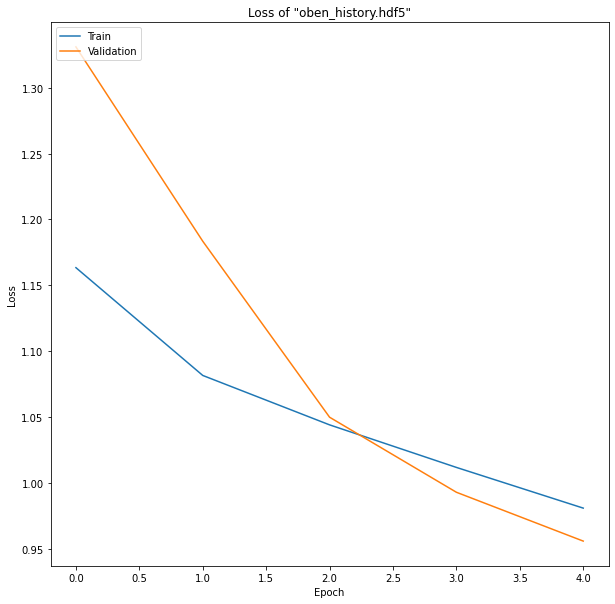

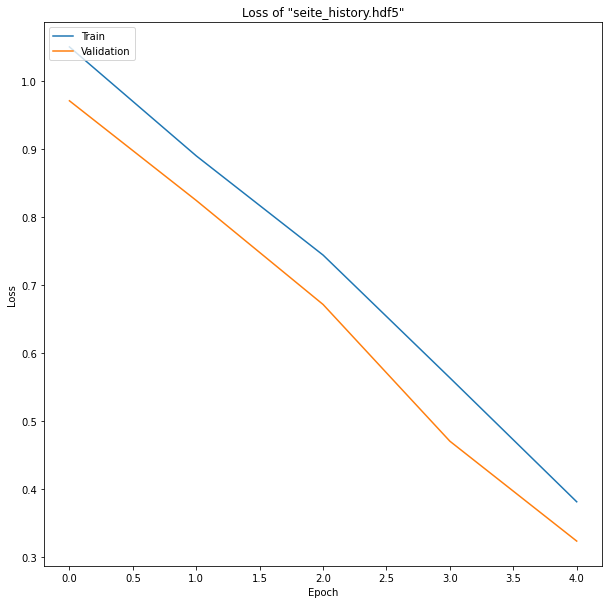

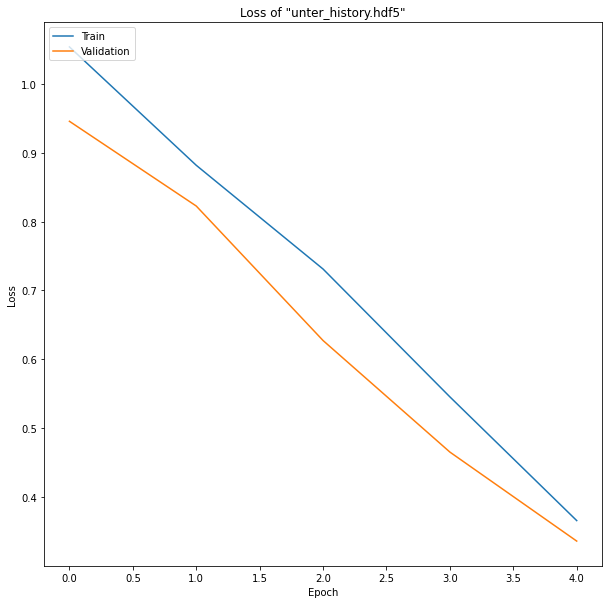

In [27]:
for history, path in zip(histories, histories_path):
    graph_loss(history, os.path.basename(path))

## Demo
### Test with validation data

457


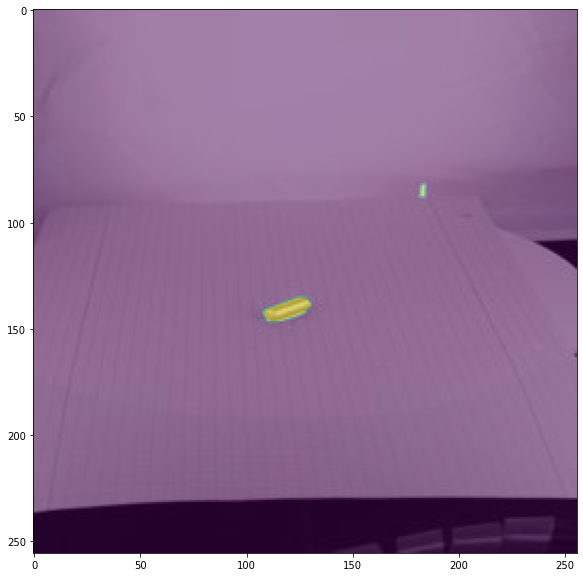

In [19]:
_, validation_set = get_seite_data_generator('./data/data_build')
print(len(validation_set))
example = next(validation_set)
plt.imshow(example[0][0])
plt.imshow(example[1][0], alpha=0.5)

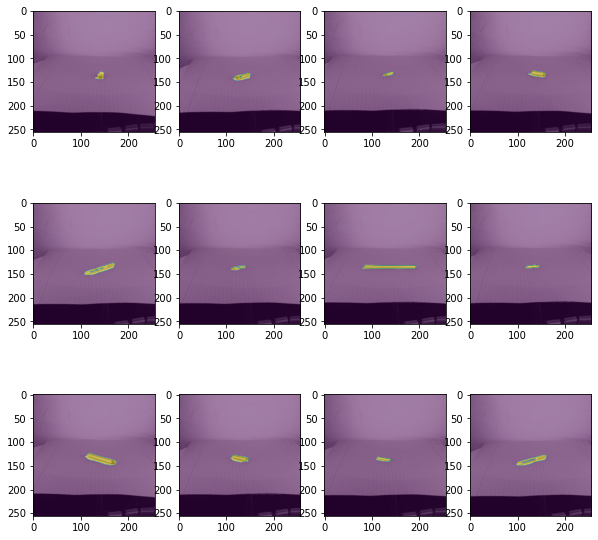

In [8]:
def evaluation(examples, model, i):
    predict = model.predict(examples)

    plt.subplot(3,4, i+1)
    plt.imshow(examples[0][0])
    plt.imshow(predict[0], alpha=0.5)

for i in range(12):
    evaluation(next(validation_set), seite_model, i)

### Dataset from another group

In [9]:
data_path = "data/data_from_another_group/muenze"
data_path1 = data_path + "/Kegelstift/**/*_rotated90.JPG"
data_path2 = data_path + "/Zylinderstift/**/*_rotated90.JPG"
validation, train = __get_data_generator(data_path1, data_path2)

print(len(validation))

323


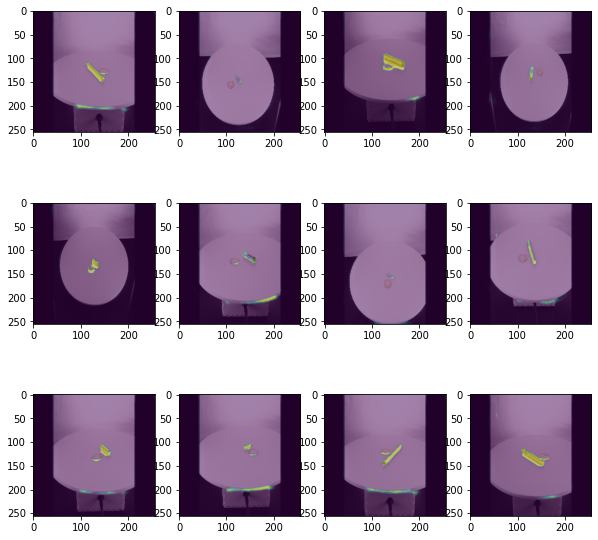

In [23]:
def img_preprocess(img):
    img = cv.resize(img, (256, 256))
    return img

validation.img_preprocess = img_preprocess
for i in range(12):
    evaluation(next(validation), seite_model, i)
